In [1]:
import numpy as np 
import pandas as pd
import scipy
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
import sklearn.model_selection as ms
import seaborn as sns
import matplotlib
from sklearn.preprocessing import Binarizer
import sklearn
import math
from sklearn.preprocessing import OneHotEncoder
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
df1=pd.read_csv(r"C:\Users\SaurabhM\Desktop\data\train_NIR5Yl1.csv")
df2=pd.read_csv(r"C:\Users\SaurabhM\Desktop\data\test_8i3B3FC.csv")

In [3]:
labelencoder_X = LabelEncoder()
df1=df1[df1["Views"]>300000]

df1['Tag'] = labelencoder_X.fit_transform(df1['Tag'])

bn = Binarizer(threshold=7)
pd_watched = bn.transform([df1['Answers']])[0]
df1['pd_watched'] = pd_watched


df1 = df1.drop(["ID","Username","Answers"],axis = 1)

In [4]:
df1["Views"]=np.log1p(df1["Views"])

df1["Reputation"]=np.log1p(df1["Reputation"])

df1["pd_watched"]=np.log1p(df1["pd_watched"])

df1["Upvotes"]=np.log1p(df1["Upvotes"])



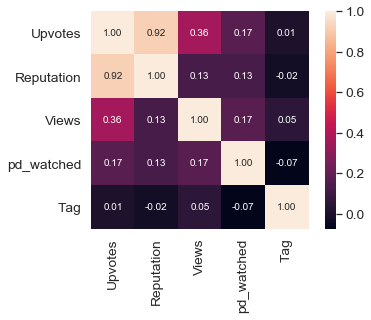

In [5]:
k = 5 #number of variables for heatmap
corrmat = df1.corr()
cols = corrmat.nlargest(k, 'Upvotes')['Upvotes'].index
cm = np.corrcoef(df1[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [6]:
target=df1["Upvotes"]
df1=df1.drop(["Upvotes"],axis=1)

In [7]:
X_train,X_test,y_train,y_test=ms.train_test_split(df1,target,test_size=0.40,random_state=42)

In [8]:

#Standard Scaling to bring the data to mean zero 
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)


In [25]:
#Ridge Regression

from sklearn.linear_model import Ridge

model = Ridge()
model.fit(X_train, y_train)
pred = model.predict(X_test)
print(r2_score(y_test, pred))
mse = sklearn.metrics.mean_squared_error(np.expm1(y_test), np.expm1(pred))
rmse = math.sqrt(mse)
print(rmse)

0.9099456940624691
12966.74706599329


In [10]:
df2.head()

,ID,Tag,Reputation,Answers,Username,Views
0,366953,a,5645,3,50652,33200
1,71864,c,24511,6,37685,2730
2,141692,i,927,1,135293,21167
3,316833,i,21,6,166998,18528
4,440445,i,4475,10,53504,57240


In [12]:
#Prediction
df2['Tag'] = labelencoder_X.fit_transform(df2['Tag'])
bn = Binarizer(threshold=7)
pd_watched = bn.transform([df2['Answers']])[0]
df2['pd_watched'] = pd_watched

id=df2["ID"]

df2 = df2.drop(["ID","Username","Answers"],axis = 1)

In [13]:
df2["Views"]=np.log1p(df2["Views"])

df2["Reputation"]=np.log1p(df2["Reputation"])

df2["pd_watched"]=np.log1p(df2["pd_watched"])

df2.shape


(141448, 4)

In [14]:
df2 = sc_X.transform(df2)
predicted=model.predict(df2)

In [15]:
predicted.shape

(141448,)

In [16]:
predicted

array([5.1546142 , 3.86176244, 3.24429551, ..., 3.64499493, 1.16581443,
       2.41799539])

In [17]:
back=np.expm1(predicted)
submission = pd.DataFrame({'ID': id,
                           'Upvotes':back
                           })

submission.to_csv(r"C:\Users\SaurabhM\Desktop\data\final_02.csv",index=False)

In [26]:

poly_reg = PolynomialFeatures(degree = 4,interaction_only=False, include_bias=True)
X_poly = poly_reg.fit_transform(X_train)
poly_reg.fit(X_train, y_train)
lin_reg_1 = linear_model.LassoLars(alpha=0.021,max_iter=150)
lin_reg_1.fit(X_poly, y_train)

# predicitng 
pred_val = lin_reg_1.predict(poly_reg.fit_transform(X_test))

print(r2_score(y_test, pred_val))

mse = sklearn.metrics.mean_squared_error(np.expm1(y_test), np.expm1(pred))
rmse = math.sqrt(mse)
print(rmse)

0.5842402628932277
12966.74706599329


In [21]:
predicted_polynomial=lin_reg_1.predict(poly_reg.fit_transform(df2))

In [22]:
predicted

array([5.1546142 , 3.86176244, 3.24429551, ..., 3.64499493, 1.16581443,
       2.41799539])

In [23]:
back=abs(np.expm1(predicted))
submission = pd.DataFrame({'ID': id,
                           'Upvotes':back
                           })

submission.to_csv(r"C:\Users\SaurabhM\Desktop\data\final_polynomial_reg_3.csv",index=False)

In [24]:
back

array([172.2289613 ,  46.54907977,  24.64363797, ...,  37.28257874,
         2.20853495,  10.22333834])